In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import category_encoders as ce

About this file
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

In [2]:
data_path = "car_evaluation.csv"
df = pd.read_csv(data_path)

In [3]:
df.shape

(1727, 7)

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
col_names_from_description = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names_from_description


In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df["class"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [10]:
print(*df["class"].unique(), sep=", ")
print("unique classes: ", len(df["class"].unique()))



unacc, acc, vgood, good
unique classes:  4


In [11]:
# Declaring feature vector and target variable
X = df.drop(["class"], axis=1)
y = df["class"]

In [12]:
## Splitting data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18069040)

In [13]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [14]:
## Feature engineering
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
81,vhigh,vhigh,5more,2,small,med
1428,low,high,2,more,big,med
547,high,high,2,2,big,high
372,vhigh,low,3,more,med,med
693,high,med,3,more,small,med


In [16]:
encoder = ce.OrdinalEncoder(cols=X_train.columns)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
81,1,1,1,1,1,1
1428,2,2,2,2,2,1
547,3,2,2,1,2,2
372,1,3,3,2,3,1
693,3,4,3,2,1,1


In [18]:
## Decisiion Tree Classifier with Criterion GINI INDEX
# create the DecisionTreeClassifier model with criterion GINI INDEX

tree_classification_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=18069040)

# fit the classification model
tree_classification_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=18069040)

In [19]:
y_prediction_gini = tree_classification_gini.predict(X_test)

In [20]:
y_prediction_gini[:5]

array(['unacc', 'unacc', 'acc', 'unacc', 'unacc'], dtype=object)

In [21]:
print("With criterion GINI Tree Classification model accuracy score is: {0:0.4f}".format(accuracy_score(y_test, y_prediction_gini)))

With criterion GINI Tree Classification model accuracy score is: 0.7572


In [22]:
y_pred_train_gini = tree_classification_gini.predict(X_train)
print("Training-set accuracy score: {0:0.4f}".format(accuracy_score(y_pred_train_gini, y_train)))

Training-set accuracy score: 0.8005


In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree_classification_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree_classification_gini.score(X_test, y_test)))

Training set score: 0.8005
Test set score: 0.7572


#### By looking at those, I can say that there is a bit of overfitting occured in the training set since the training error (bias) is higher than the test error (variance).

[Text(267.84000000000003, 380.52, 'X[3] <= 1.5\ngini = 0.433\nsamples = 1208\nvalue = [247, 44, 873, 44]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 430\nvalue = [0, 0, 430, 0]'),
 Text(401.76000000000005, 271.8, 'X[5] <= 2.5\ngini = 0.569\nsamples = 778\nvalue = [247, 44, 443, 44]'),
 Text(267.84000000000003, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.632\nsamples = 506\nvalue = [247, 44, 171, 44]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.531\nsamples = 253\nvalue = [113, 0, 131, 9]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.645\nsamples = 253\nvalue = [134, 44, 40, 35]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 272\nvalue = [0, 0, 272, 0]')]

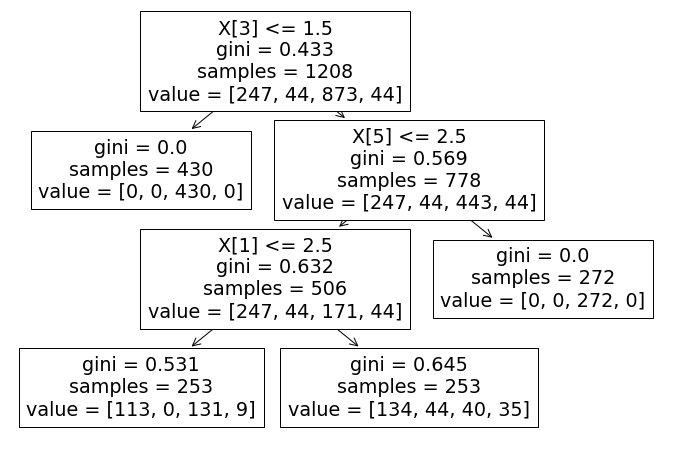

In [24]:
## Plotting the tree
plt.figure(figsize=(12, 8))

tree.plot_tree(tree_classification_gini.fit(X_train, y_train))

In [25]:
## Creating the decisiontreeclassifier model with ENTROPY criterion instead of GINI INDEX

In [26]:

tree_classification_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=18069040)
# fit the model
tree_classification_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=18069040)

In [27]:
y_prediction_entropy = tree_classification_entropy.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_prediction_entropy)))
y_prediction_train_entropy = tree_classification_entropy.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_prediction_train_entropy)))

Model accuracy score with criterion entropy: 0.7572
Training-set accuracy score: 0.8005


In [28]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(tree_classification_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(tree_classification_entropy.score(X_test, y_test)))


Training set score: 0.8005
Test set score: 0.7572


[Text(267.84000000000003, 380.52, 'X[3] <= 1.5\nentropy = 1.155\nsamples = 1208\nvalue = [247, 44, 873, 44]'),
 Text(133.92000000000002, 271.8, 'entropy = 0.0\nsamples = 430\nvalue = [0, 0, 430, 0]'),
 Text(401.76000000000005, 271.8, 'X[5] <= 2.5\nentropy = 1.457\nsamples = 778\nvalue = [247, 44, 443, 44]'),
 Text(267.84000000000003, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.647\nsamples = 506\nvalue = [247, 44, 171, 44]'),
 Text(133.92000000000002, 54.360000000000014, 'entropy = 1.182\nsamples = 253\nvalue = [113, 0, 131, 9]'),
 Text(401.76000000000005, 54.360000000000014, 'entropy = 1.74\nsamples = 253\nvalue = [134, 44, 40, 35]'),
 Text(535.6800000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 272\nvalue = [0, 0, 272, 0]')]

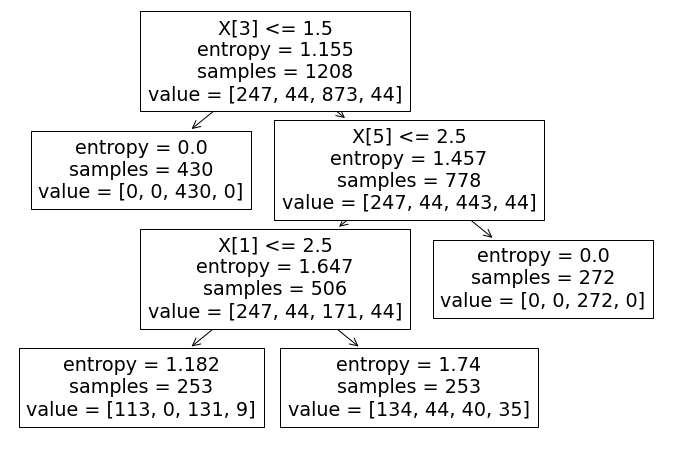

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_classification_entropy.fit(X_train, y_train)) 

In [30]:
## Confusion Matrix
# Confusion matrix is going to give us a clear picutre of our classification
# models' performances
con_matrix = confusion_matrix(y_test, y_prediction_entropy)
print("confusion Matrix:\n", con_matrix)

confusion Matrix:
 [[ 73   0  64   0]
 [ 25   0   0   0]
 [ 16   0 320   0]
 [ 17   0   4   0]]


In [33]:
print("classification report: \n", classification_report(y_test, y_prediction_entropy, zero_division=True))

classification report: 
               precision    recall  f1-score   support

         acc       0.56      0.53      0.54       137
        good       1.00      0.00      0.00        25
       unacc       0.82      0.95      0.88       336
       vgood       1.00      0.00      0.00        21

    accuracy                           0.76       519
   macro avg       0.85      0.37      0.36       519
weighted avg       0.77      0.76      0.72       519

